# Udacity机器学习纳米学位毕业项目——文档分类#

## I. 问题的定义 ##
### 项目概述 ###
文档归类问题所属的研究领域是自然语言处理（简称NLP），它是机器学习技术的一项重要应用，研究的是人与计算机之前如何使用自然语言进行有效通信的方法。
通过对NLP的研究，可以使计算机理解自然语言文本的意义，人类也可以用自己最习惯的语言来使用计算机；人类也可以通过它进一步了解人类语言能力和智能的机制。
目前NLP的主要应用领域有：聊天机器人、智能客服、金融领域的智能理赔、智能投研等。

### 问题的陈述 ###
本项目要解决的一个具体问题是通过对一组经典文本数据（20news-bydate，来自`http://www.qwone.com/~jason/20Newsgroups/`）进行研究，使用NLP的方法进行文档归类，并对分类结果进行评估。

### 评价指标 ###
衡量解决方案的标准主要有：分类模型的准确率

## II. 分析##
### 数据的探索###

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pickle
import logging
import sys
import re
import os
import zipfile
import multiprocessing
from time import time
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

from nltk.stem import SnowballStemmer
from nltk import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
import nltk

import tensorflow as tf
from gensim.models import Word2Vec, KeyedVectors

nltk.download('stopwords')

logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
                  'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
                  'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
                  'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
                  'talk.politics.misc', 'talk.religion.misc']
data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42, remove=())
print()
print('A preview of data: ')
print(data_train.data[0])

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhanglongyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

A preview of data: 
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







### 探索性可视化

### 算法和技术

### 基准模型

Module created for script run in IPython
Usage: twentynewsmodel.py [options]

Options:
  -h, --help         show this help message and exit
  --all_categories   Whether to use all categories or not.
  --words_lemmatize  Whether to use lemmatize data or not.
  --words_stemmer    Whether to use stemmered data or not.
  --stop_words       Whether to use english stopwords of nltk or not.

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 1.257424s at 3.165MB/s
n_samples: 2034, n_features: 33809

Extracting features from the test data using the same vectorizer
done in 0.606593s at 4.727MB/s
n_samples: 1353, n_features: 33809

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alp

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


train time: 0.340s
test time:  0.014s
accuracy:   0.897
dimensionality: 33809
density: 1.000000
top 10 keywords per class:
alt.atheism: atheist osrhe wingate god okcforum caltech islamic atheism keith...
comp.graphics: format video looking card hi 3d thanks file image graphics
sci.space: digex flight shuttle launch pat moon sci orbit nasa space
talk.religion.misc: jesus mitre hudson morality biblical 2000 beast mr fbi ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.83      0.85       319
     comp.graphics       0.90      0.98      0.94       389
         sci.space       0.96      0.94      0.95       394
talk.religion.misc       0.83      0.78      0.80       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[266   9   7  37]
 [  1 381   4   3]
 [  0  22 372   0]
 [ 40  10   6 195]]

Perceptron
______________________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.261s
test time:  0.002s
accuracy:   0.885
dimensionality: 33809
density: 0.240165
top 10 keywords per class:
alt.atheism: mantis example religion okcforum rice religious thing keith athe...
comp.graphics: bates albany jr0930 pov video windows package imagine file gra...
sci.space: observations solar comet planets astro moon sci funding orbit space
talk.religion.misc: loving told mr stephen 2000 frank fbi buffalo abortion ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.85      0.81      0.83       319
     comp.graphics       0.91      0.96      0.94       389
         sci.space       0.93      0.94      0.94       394
talk.religion.misc       0.80      0.77      0.79       251

       avg / total       0.88      0.89      0.88      1353

confusion matrix:
[[259   8   9  43]
 [  4 373   9   3]
 [  5  15 372   2]
 [ 36  12   9 194]]

Passive-Aggressive
_____________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.431s
test time:  0.016s
accuracy:   0.905
dimensionality: 33809
density: 0.702069
top 10 keywords per class:
alt.atheism: osrhe wingate cobb okcforum caltech atheist islamic keith atheis...
comp.graphics: 42 tiff package 3d windows video code file image graphics
sci.space: alaska pat shuttle dc sci launch nasa moon orbit space
talk.religion.misc: abortion 666 hudson homosexuality mr beast 2000 morality ...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.84      0.86       319
     comp.graphics       0.93      0.97      0.95       389
         sci.space       0.95      0.95      0.95       394
talk.religion.misc       0.83      0.80      0.82       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[269   5  10  35]
 [  2 379   4   4]
 [  1  18 374   1]
 [ 37   7   5 202]]

kNN
________________________________________________________________________________
Training

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


test time:  0.007s
accuracy:   0.903
dimensionality: 33809
density: 0.664483
top 10 keywords per class:
alt.atheism: charley osrhe okcforum wingate cobb caltech islamic keith atheis...
comp.graphics: computer video 3do hi 42 3d animation file image graphics
sci.space: shuttle pat planets launch sci dc moon nasa orbit space
talk.religion.misc: frank abortion biblical 666 morality fbi mr 2000 beast ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.83      0.85       319
     comp.graphics       0.92      0.98      0.95       389
         sci.space       0.96      0.95      0.95       394
talk.religion.misc       0.82      0.80      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[266   7   8  38]
 [  1 380   3   5]
 [  1  19 374   0]
 [ 37   7   5 202]]

L1 penalty
________________________________________________________________________________
Training: 
LinearSV

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 1.075s
test time:  0.002s
accuracy:   0.888
dimensionality: 33809
density: 0.020150
top 10 keywords per class:
alt.atheism: psilink penalty rushdie rice charley wingate keith atheism islam...
comp.graphics: windows 3d file card 3do animation files hi image graphics
sci.space: aurora breathing pat nasa launch moon flight dc orbit space
talk.religion.misc: 2000 mitre biblical christ homosexuality beast mr abortio...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.85      0.78      0.82       319
     comp.graphics       0.93      0.97      0.95       389
         sci.space       0.94      0.95      0.94       394
talk.religion.misc       0.78      0.79      0.78       251

       avg / total       0.89      0.89      0.89      1353

confusion matrix:
[[250   6  12  51]
 [  1 379   6   3]
 [  4  13 374   3]
 [ 38   9   6 198]]

Elastic-Net penalty
___________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 1.270s
test time:  0.002s
accuracy:   0.901
dimensionality: 33809
density: 0.187324
top 10 keywords per class:
alt.atheism: caltech rushdie charley okcforum cobb wingate islamic keith athe...
comp.graphics: points computer hi 42 3do 3d file animation image graphics
sci.space: pat shuttle planets launch sci dc nasa moon orbit space
talk.religion.misc: homosexuality abortion 666 morality biblical mr 2000 fbi ...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.83      0.85       319
     comp.graphics       0.92      0.98      0.95       389
         sci.space       0.96      0.95      0.95       394
talk.religion.misc       0.82      0.80      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[266   7   8  38]
 [  0 380   4   5]
 [  2  18 373   1]
 [ 39   7   5 200]]

NearestCentroid (aka Rocchio classifier)
__________________________________________________

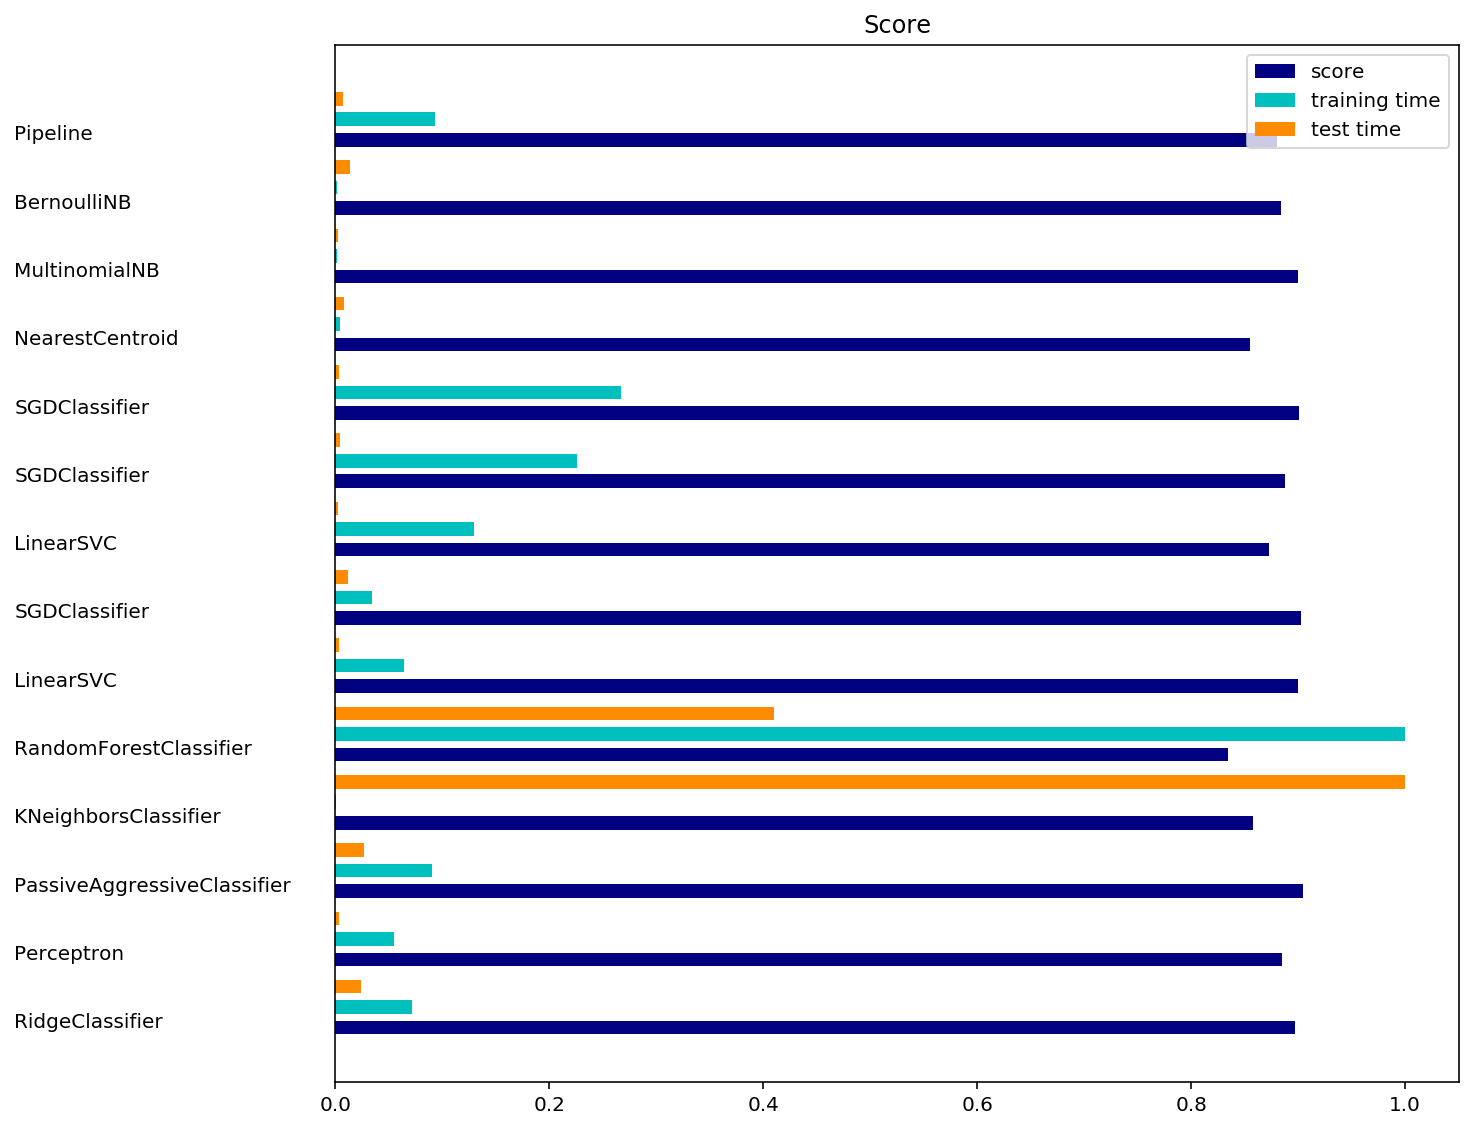

In [2]:
%run twentynewsmodel.py

## III. 方法
### 数据预处理

In [17]:
#生成20news-no-stop

def preprocess(data):
    stop_words = stopwords.words('english')
    data_nopara = [" ".join(document.split("\n")) for document in data]
    data_tokenized = [[word.lower() for word in regexp_tokenize(document, "\\b[a-zA-Z]{3,}\\b")] 
                      for document in data_nopara]
    #data_stemmer = [[stemmer.stem(word) for word in document] for document in data_tokenized]
    return [[word for word in document if not word in stop_words] 
            for document in data_tokenized]

t0 = time()
data_train_original = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42, remove=())

data_train_noheaders = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42, remove=('headers'))

data_nh_train = []
for A,B in zip(data_train_original.data, data_train_noheaders.data):
    for a in A.split('\n'):
        if a[:8]=='Subject:':
            data_nh_train.append(a[9:]+' '+B)
            break
            
#####################################
#X_nh_train - 预处理后的训练集
X_nh_train = preprocess(data_nh_train)
data_train_input = [' '.join(document) for document in X_nh_train]


data_test_original = fetch_20newsgroups(subset='test', categories=categories,
                                shuffle=True, random_state=42, remove=())

data_test_noheaders = fetch_20newsgroups(subset='test', categories=categories,
                                shuffle=True, random_state=42, remove=('headers'))

data_nh_test = []
for A,B in zip(data_test_original.data, data_test_noheaders.data):
    for a in A.split('\n'):
        if a[:8]=='Subject:':
            data_nh_test.append(a[9:]+' '+B)
            break

#####################################
#X_nh_test - 预处理后的测试集
X_nh_test = preprocess(data_nh_test)
data_test_input = [' '.join(document) for document in X_nh_train]

y_nh_train, y_nh_test = data_train_original.target, data_test_original.target

duration = time() - t0
print ("Total preprocessing time: %0.3f seconds" % duration)

print(X_nh_train[0])

Total preprocessing time: 10.418 seconds
['car', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'door', 'sports', 'car', 'looked', 'late', 'early', 'called', 'bricklin', 'doors', 'really', 'small', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'production', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'brought', 'neighborhood', 'lerxst']


In [26]:
stemmer = SnowballStemmer("english")
X_stem_train = [[stemmer.stem(word) for word in document] for document in X_nh_train]
X_stem_test = [[stemmer.stem(word) for word in document] for document in X_nh_test]

print(X_stem_train[0])

['car', 'wonder', 'anyon', 'could', 'enlighten', 'car', 'saw', 'day', 'door', 'sport', 'car', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'realli', 'small', 'addit', 'front', 'bumper', 'separ', 'rest', 'bodi', 'know', 'anyon', 'tellm', 'model', 'name', 'engin', 'spec', 'year', 'product', 'car', 'made', 'histori', 'whatev', 'info', 'funki', 'look', 'car', 'pleas', 'mail', 'thank', 'brought', 'neighborhood', 'lerxst']


### 执行过程

In [20]:
#对stem后的数据做word2vec 
t0 = time()
all_data_stem = np.append(X_stem_train, X_stem_test)

size = 250

model_stem = Word2Vec(all_data_stem, size=size, alpha=0.05, window=30, min_count=5, workers=multiprocessing.cpu_count())

w2v_stem = model_stem.wv
del model_stem

duration = time() - t0
print ("Total word2vec processing time: %0.3f seconds" % duration)

2018-06-07 17:17:30,986 WARNING consider setting layer size to a multiple of 4 for greater performance
2018-06-07 17:17:30,988 INFO collecting all words and their counts
2018-06-07 17:17:30,989 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-07 17:17:31,319 INFO PROGRESS: at sentence #10000, processed 1432141 words, keeping 56203 word types
2018-06-07 17:17:31,547 INFO collected 77749 word types from a corpus of 2633040 raw words and 18846 sentences
2018-06-07 17:17:31,548 INFO Loading a fresh vocabulary
2018-06-07 17:17:31,618 INFO min_count=5 retains 24330 unique words (31% of original 77749, drops 53419)
2018-06-07 17:17:31,618 INFO min_count=5 leaves 2545145 word corpus (96% of original 2633040, drops 87895)
2018-06-07 17:17:31,695 INFO deleting the raw counts dictionary of 77749 items
2018-06-07 17:17:31,699 INFO sample=0.001 downsamples 16 most-common words
2018-06-07 17:17:31,700 INFO downsampling leaves estimated 2486759 word corpus (97.7% of prio

Total word2vec processing time: 32.759 seconds


In [7]:
#接入现成的词向量glove6B和30B
import urllib
from tqdm import tqdm

def mkdir(path):
    path=path.strip()
    path=path.rstrip("\\")
    isExists=os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        return True
    else:
        return False
mkdir('data/model')

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

t0 = time()
glove6B_zip_path = 'data/glove.6B.zip'
glove6B_folder_path = 'data/golve.6B'
        
if not os.path.isfile(glove6B_zip_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='glove6B Dataset') as pbar:
        urllib.request.urlretrieve(
            'http://nlp.stanford.edu/data/glove.6B.zip',
            glove6B_zip_path,
            pbar.hook)
    
if not os.path.isdir(glove6B_folder_path):
    with zipfile.ZipFile(glove6B_zip_path) as zipex:
        zipex.extractall(glove6B_folder_path)
        zipex.close()


glove840B300d_zip_path = 'data/glove.840B.300d.zip'
glove840B300d_folder_path = 'data/glove.840B.300d'
        
if not os.path.isfile(glove840B300d_zip_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='glove840B300d Dataset') as pbar:
        urllib.request.urlretrieve(
            'http://nlp.stanford.edu/data/glove.840B.300d.zip',
            glove840B300d_zip_path,
            pbar.hook)
    
if not os.path.isdir(glove840B300d_folder_path):
    with zipfile.ZipFile(glove840B300d_zip_path) as zipex:
        zipex.extractall(glove840B300d_folder_path)
        zipex.close()
duration = time() - t0              
print('All files ready!')
print("Total glove-vectors download&extract time: %0.3f seconds" % duration)

All files ready!
Total glove-vectors download&extract time: 0.001 seconds


In [8]:
#接入现成的词向量glove6B和30B
GLOVE_6B_50D_PATH = 'data/golve.6B/glove.6B.50d.txt'
GLOVE_840B_300D_PATH = 'data/glove.840B.300d/glove.840B.300d.txt'
encoding = 'utf-8'
t0 = time()
glove_small = {}
with open(GLOVE_6B_50D_PATH, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0].decode(encoding)
        if (word in all_words):
            nums=np.array(parts[1:], dtype=np.float32)
            glove_small[word] = nums

            
glove_big = {}
with open(GLOVE_840B_300D_PATH, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0].decode(encoding)
        if word in all_words:
            nums=np.array(parts[1:], dtype=np.float32)
            glove_big[word] = nums
            
duration = time() - t0
print ("Total glove-vectors processing time: %0.3f seconds" % duration)

Total glove-vectors processing time: 56.055 seconds


In [21]:
#为TextCNN预处理数据：基于w2v_stem的X_stem_train、X_stem_test、y_nh_train、y_nh_test
vocabulary_index2word = {}
vocabulary_word2index = {}
index = 0

all_words_stem = set(word for document in all_data_stem for word in document)

for word in all_words_stem:
    vocabulary_index2word[index] = word
    vocabulary_word2index[word] = index
    index += 1

vocab_size = len(vocabulary_word2index)
print("model_vocab_size:",vocab_size)
num_classes = 20
print("num_classes:",num_classes)

model_vocab_size: 77749
num_classes: 20


In [81]:
#处理dictionary
w2v_prep = {}
for i in range(vocab_size):
    if vocabulary_index2word[i] in w2v_stem:
        w2v_prep[vocabulary_index2word[i]] = w2v_stem[vocabulary_index2word[i]]
    else:
        w2v_prep[vocabulary_index2word[i]] = np.random.uniform(-np.sqrt(6.0) / np.sqrt(vocab_size), 
                                                               np.sqrt(6.0) / np.sqrt(vocab_size), size)

print(len(w2v_prep))


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


77749


### 使用vocabulary_word2index，把X_train和X_test的单词转化为index

In [28]:
X_stem_train_i = [[vocabulary_word2index[word] for word in document] for document in X_stem_train]
X_stem_test_i = [[vocabulary_word2index[word] for word in document] for document in X_stem_test]

print(X_stem_train_i[0])
print()
print(y_nh_train[0])

[34709, 27496, 26222, 50910, 76112, 34709, 13916, 53832, 195, 29, 34709, 7897, 17417, 34951, 59840, 9533, 195, 64859, 17523, 721, 22481, 27999, 71724, 3978, 37961, 28612, 26222, 75661, 70186, 71567, 28581, 8517, 16190, 68323, 34709, 11985, 35468, 34022, 2407, 72939, 7897, 34709, 51804, 23706, 56183, 54101, 50476, 10088]

7


In [63]:
#将y_nh_train和y_nh_test转变为multilabel的格式
y_multi_train = [[[0.] for i in range(20)] for i in range(len(X_stem_train_i))]
for i in range(len(X_stem_train_i)):
    y_multi_train[i][y_nh_train[i]] = [1.]
y_multi_train = np.array(y_multi_train)
print('y_multi_train example: ')
print(y_multi_train[0])

y_multi_test = [[[0.] for i in range(20)] for i in range(len(X_stem_test_i))]
for i in range(len(X_stem_test_i)):
    y_multi_test[i][y_nh_test[i]] = [1.]
y_multi_test = np.array(y_multi_test)
print('y_multi_test example: ')
print(y_multi_test[0])

y_multi_train example: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
y_multi_test example: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [3]:
#保存cache
cache_pik = 'cache_SWEM'
if not os.path.isdir(cache_pik):
    os.makedirs(cache_pik)
    
cache_path = cache_pik + '/' + 'data.pik'
print('cache path:', cache_path)
print('file exists:', os.path.exists(cache_path))
if os.path.exists(cache_path):
    with open(cache_path,'rb') as data_f:
        X_stem_train_i,X_stem_test_i,y_multi_train, y_multi_test, vocabulary_word2index, vocabulary_index2word, w2v_prep = pickle.load(data_f)

if not os.path.exists(cache_path):
    with open(cache_path, 'ab') as data_f:
        pickle.dump((X_stem_train_i, X_stem_test_i, y_multi_train, y_multi_test, vocabulary_word2index, 
                     vocabulary_index2word, w2v_prep), data_f)

print('Total words: %d' % len(vocabulary_index2word))       


cache path: cache_SWEM/data.pik
file exists: True
Total words: 77749


### SWEM做文本分类

### 考虑6种情况
词向量有4组：w2v、w2v_stem、glove_small、glove_big

数据有2组：X_nh_train、X_stem_train

w2v不与stem一起计算、w2v_stem不与X_nh_train一起计算

优先计算w2v_stem
X_stem_train、X_stem_test

In [4]:
# -*- coding: utf-8 -*-
#GPUID = 0
#os.environ['CUDA_VISIBLE_DEVICES'] = str(GPUID)

from tensorflow.contrib import learn
from tensorflow.contrib.learn.python.learn import learn_runner
from tensorflow.python.platform import tf_logging as logging
from tensorflow.python import pywrap_tensorflow

import scipy.io as sio
from math import floor
import pdb

logging.set_verbosity(logging.INFO)

class Options(object):
    def __init__(self):
        self.fix_emb = True
        self.restore = None #whether to store data or not
        self.model = 'SWEM' 

        self.W_emb = None
        self.maxlen = 200  # ae value
        self.n_words = None #number of words
        self.filter_shape = 5
        self.filter_size = 100
        self.embed_size = 250 
        self.lr = 2e-4
        self.layer = 3
        self.stride = [2, 2]  # for two layer cnn/deconv , use self.stride[0]
        self.batch_size = 50
        self.max_epochs = 10
        self.drop_rate = 0.8

        #self.part_data = False #只用一部分数据
        self.portion = 1.0  # 10%  1% 是啥

        self.save_path = "./save/twenty_newsgroup"
        self.log_path = "./log"
        self.valid_freq = 100 #每迭代100次输出一次结果

        self.dropout = 0.5
        self.H_dis = 250 #输出维度吗？

        print ('Use model %s' % self.model)
        #print ('Use %d conv/deconv layers' % self.layer)

    def __iter__(self):
        for attr, value in self.__dict__.items():
            yield attr, value

def discriminator_2layer(H, opt, dropout, prefix='', num_outputs=1, is_reuse=None):
    # last layer must be linear
    # H = tf.squeeze(H, [1,2])
    # pdb.set_trace()
    biasInit = tf.constant_initializer(0.001, dtype=tf.float32)
    H_dis = tf.contrib.layers.fully_connected(tf.nn.dropout(H, keep_prob=dropout), num_outputs=opt.H_dis,
                                   biases_initializer=biasInit, activation_fn=tf.nn.relu, scope=prefix + 'dis_1',
                                   reuse=is_reuse)
    logits = tf.contrib.layers.linear(tf.nn.dropout(H_dis, keep_prob=dropout), num_outputs=num_outputs,
                           biases_initializer=biasInit, scope=prefix + 'dis_2', reuse=is_reuse)
    return logits

def embedding(features, opt, prefix='', is_reuse=None):
    """Customized function to transform batched x into embeddings."""
    # Convert indexes of words into embeddings.
    #  b = tf.get_variable('b', [opt.embed_size], initializer = tf,random_uniform_initializer(-0.01, 0.01))
    with tf.variable_scope(prefix + 'embed', reuse=is_reuse):
        if opt.fix_emb:
            assert (np.shape(np.array(opt.W_emb)) == (opt.n_words, opt.embed_size))
            W = tf.get_variable('W', initializer=opt.W_emb, trainable=True)
            print("initialize word embedding finished")
        else:
            weightInit = tf.random_uniform_initializer(-0.001, 0.001)
            W = tf.get_variable('W', [opt.n_words, opt.embed_size], initializer=weightInit)
            # tf.stop_gradient(W)

    # W_norm = normalizing(W, 1)
    word_vectors = tf.nn.embedding_lookup(W, features)

    return word_vectors, W
def prepare_data_for_emb(seqs_x, opt):
    maxlen = opt.maxlen
    lengths_x = [len(s) for s in seqs_x]
    if maxlen != None:
        new_seqs_x = []
        new_lengths_x = []
        for l_x, s_x in zip(lengths_x, seqs_x):
            if l_x < maxlen:
                new_seqs_x.append(s_x)
                new_lengths_x.append(l_x)
            else:
                new_seqs_x.append(s_x[:maxlen])
                new_lengths_x.append(maxlen)
        lengths_x = new_lengths_x
        seqs_x = new_seqs_x

        if len(lengths_x) < 1:
            return None, None

    n_samples = len(seqs_x)
    maxlen_x = np.max(lengths_x)
    x = np.zeros((n_samples, maxlen)).astype('int32')
    x_mask = np.zeros((n_samples, maxlen)).astype('float32')
    for idx, s_x in enumerate(seqs_x):
        x[idx, :lengths_x[idx]] = s_x
        x_mask[idx, :lengths_x[idx]] = 1. # change to remove the real END token

    return x, x_mask

def get_minibatches_idx(n, minibatch_size, shuffle=False):
    idx_list = np.arange(n, dtype="int32")

    if shuffle:
        np.random.shuffle(idx_list)

    minibatches = []
    minibatch_start = 0
    for i in range(n // minibatch_size):
        minibatches.append(idx_list[minibatch_start:
                                    minibatch_start + minibatch_size])
        minibatch_start += minibatch_size

    # if (minibatch_start != n):
    #     # Make a minibatch out of what is left
    #     minibatches.append(idx_list[minibatch_start:])

    return zip(range(len(minibatches)), minibatches)

def tensors_key_in_file(file_name):
    """Return tensors key in a checkpoint file.
    Args:
    file_name: Name of the checkpoint file.
    """
    try:
        reader = pywrap_tensorflow.NewCheckpointReader(file_name)
        return reader.get_variable_to_shape_map()
    except Exception as e:  # pylint: disable=broad-except
        print(str(e))
        return None


            
def auto_encoder(x, x_mask, y, dropout, opt):
    # print x.get_shape()  # batch L
    x_emb, W_norm = embedding(x, opt)  # batch L emb
    x_emb = tf.expand_dims(x_emb, 3)  # batch L emb 1
    x_emb = tf.nn.dropout(x_emb, dropout)

    x_mask = tf.expand_dims(x_mask, axis=-1)
    x_mask = tf.expand_dims(x_mask, axis=-1)  # batch L 1 1

    x_sum = tf.multiply(x_emb, x_mask)  # batch L emb 1
    H_enc = tf.reduce_sum(x_sum, axis=1, keep_dims=True)  # batch 1 emb 1
    H_enc = tf.squeeze(H_enc)  # batch emb
    x_mask_sum = tf.reduce_sum(x_mask, axis=1, keep_dims=True)  # batch 1 1 1
    x_mask_sum = tf.squeeze(x_mask_sum, [2, 3])  # batch 1

    H_enc_1 = H_enc / x_mask_sum  # batch emb

    H_enc_2 = tf.nn.max_pool(x_emb, [1, opt.maxlen, 1, 1], [1, 1, 1, 1], 'VALID')
    H_enc_2 = tf.squeeze(H_enc_2)

    H_enc = tf.concat([H_enc_1, H_enc_2], 1)

    H_enc = tf.squeeze(H_enc)
    logits = discriminator_2layer(H_enc, opt, dropout, prefix='classify_', num_outputs=14, is_reuse=None)  # batch * 1
    prob = tf.nn.softmax(logits)

    correct_prediction = tf.equal(tf.argmax(prob, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))

    train_op = tf.contrib.layers.optimize_loss(loss, tf.contrib.framework.get_global_step(), 
                                               optimizer='Adam', learning_rate=opt.lr)
    return accuracy, loss, train_op



In [7]:
opt = Options()
opt.n_words = len(vocabulary_index2word)
opt.W_emb = [w2v_prep[vocabulary_index2word[i]] for i in range(len(vocabulary_index2word))]

with tf.device('/cpu:0'):
    x_ = tf.placeholder(tf.int32, shape=[opt.batch_size, opt.maxlen])
    x_mask_ = tf.placeholder(tf.float32, shape=[opt.batch_size, opt.maxlen])
    keep_prob = tf.placeholder(tf.float32)
    y_ = tf.placeholder(tf.float32, shape=[opt.batch_size, 14])
    accuracy_, loss_, train_op = auto_encoder(x_, x_mask_, y_, keep_prob, opt)

uidx = 0
max_test_accuracy = 0.
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=1)
config = tf.ConfigProto(log_device_placement=False, allow_soft_placement=True)
config.gpu_options.allow_growth = True
np.set_printoptions(precision=3)
np.set_printoptions(threshold=np.inf)
saver = tf.train.Saver()

with tf.Session(config=config) as sess:

    #train_writer = tf.summary.FileWriter(opt.log_path + '/train', sess.graph)
    #test_writer = tf.summary.FileWriter(opt.log_path + '/test', sess.graph)
    sess.run(tf.global_variables_initializer())
    #if opt.restore:
    #    try:

    #        t_vars = tf.trainable_variables()
    #        # print([var.name[:-2] for var in t_vars])
    #        save_keys = tensors_key_in_file(opt.save_path)
    #        # print(save_keys.keys())
    #        ss = set([var.name for var in t_vars]) & set([s + ":0" for s in save_keys.keys()])
    #        cc = {var.name: var for var in t_vars}
    #        # only restore variables with correct shape
    #        ss_right_shape = set([s for s in ss if cc[s].get_shape() == save_keys[s[:-2]]])

    #        loader = tf.train.Saver(var_list=[var for var in t_vars if var.name in ss_right_shape])
    #        loader.restore(sess, opt.save_path)

    #        print("Loading variables from '%s'." % opt.save_path)
    #        print("Loaded variables:" + str(ss))

    #    except:
    #        print("No saving session, using random initialization")
    #        sess.run(tf.global_variables_initializer())

    try:
        for epoch in range(opt.max_epochs):
            print("Starting epoch %d" % epoch)
            kf = get_minibatches_idx(len(X_stem_train_i), opt.batch_size, shuffle=True)
            for _, train_index in kf:
                uidx += 1
                sents = [X_stem_train_i[t] for t in train_index]
                x_labels = [y_multi_train[t] for t in train_index]
                x_labels = np.array(x_labels)
                x_labels = x_labels.reshape((len(x_labels), 20))

                x_batch, x_batch_mask = prepare_data_for_emb(sents, opt)  # Batch L

                _, loss = sess.run([train_op, loss_], feed_dict={x_: x_batch, x_mask_: x_batch_mask, y_: x_labels,
                                                                     keep_prob: opt.drop_rate})

                if uidx % opt.valid_freq == 0:
                    train_correct = 0.0
                    kf_train = get_minibatches_idx(400, opt.batch_size, shuffle=True)
                    for _, train_index in kf_train:
                        train_sents = [X_stem_train_i[t] for t in train_index]
                        train_labels = [y_multi_train[t] for t in train_index]
                        train_labels = np.array(train_labels)
                        train_labels = train_labels.reshape((len(train_labels), 20))
                        x_train_batch, x_train_batch_mask = prepare_data_for_emb(train_sents, opt)

                        train_accuracy = sess.run(accuracy_,feed_dict={x_: x_train_batch, 
                                                                       x_mask_: x_train_batch_mask,
                                                                       y_: train_labels, keep_prob: 1.0})

                        train_correct += train_accuracy * len(train_index)

                    train_accuracy = train_correct / 400

                    print("Epoch %d, Iteration %d: Training loss %f " % (epoch, uidx, loss))
                    print("Train accuracy %f " % train_accuracy)

                    test_correct = 0.0
                    kf_test = get_minibatches_idx(len(X_stem_test_i), opt.batch_size, shuffle=True)
                    for _, test_index in kf_test:
                        test_sents = [X_stem_test_i[t] for t in test_index]
                        test_labels = [y_multi_test[t] for t in test_index]
                        test_labels = np.array(test_labels)
                        test_labels = test_labels.reshape((len(test_labels), 20))
                        x_test_batch, x_test_batch_mask = prepare_data_for_emb(test_sents, opt)

                        test_accuracy = sess.run(accuracy_, feed_dict={x_: x_test_batch, x_mask_: x_test_batch_mask, 
                                                                       y_: test_labels, keep_prob: 1.0})

                        test_correct += test_accuracy * len(test_index)

                    test_accuracy = test_correct / len(test)

                    print("Test accuracy %f " % test_accuracy)

                    max_test_accuracy = test_accuracy

            print("Epoch %d: Max Test accuracy %f" % (epoch, max_test_accuracy))

            saver.save(sess, opt.save_path, global_step=epoch)

        print("Max Test accuracy %f " % max_test_accuracy)

    except KeyboardInterrupt:
        # print 'Training interupted'
        print('Training interupted')
        print("Max Test accuracy %f " % max_test_accuracy)

Use model SWEM


KeyboardInterrupt: 

### 其他方法

In [8]:
#方法1：依照w2v模型对每篇文档词向量求均值，并使用分类模型进行分类

def w2v_mean_glob(data):
    return np.array([np.mean([glove_big[word] for word in document if word in glove_big] 
                             or [np.zeros(300)], axis = 0) for document in data])
    
def w2v_mean(data):
    return np.array([np.mean([w2v[word] for word in document if word in w2v] 
                             or [np.zeros(size)], axis = 0) for document in data])

    
X_w2vm_glob_train = w2v_mean_glob(X_nh_train)
X_w2vm_glob_test = w2v_mean_glob(X_nh_test)

X_w2vm_train = w2v_mean(X_nh_train)
X_w2vm_test = w2v_mean(X_nh_test)

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.023s
test time:  0.000s
accuracy:   0.840

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 0.163s
test time:  0.000s
accuracy:   0.856

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.092s
test time:  0.002s
accuracy:   0.827

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 1.823s
test time:  0.001s
accuracy:   0.851

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.222s
test time:  0.001s
accuracy:   0.840

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.257s
test time:  0.001s
accuracy:   0.846

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 2.589s
test time:  0.001s
accuracy:   0.856

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
         

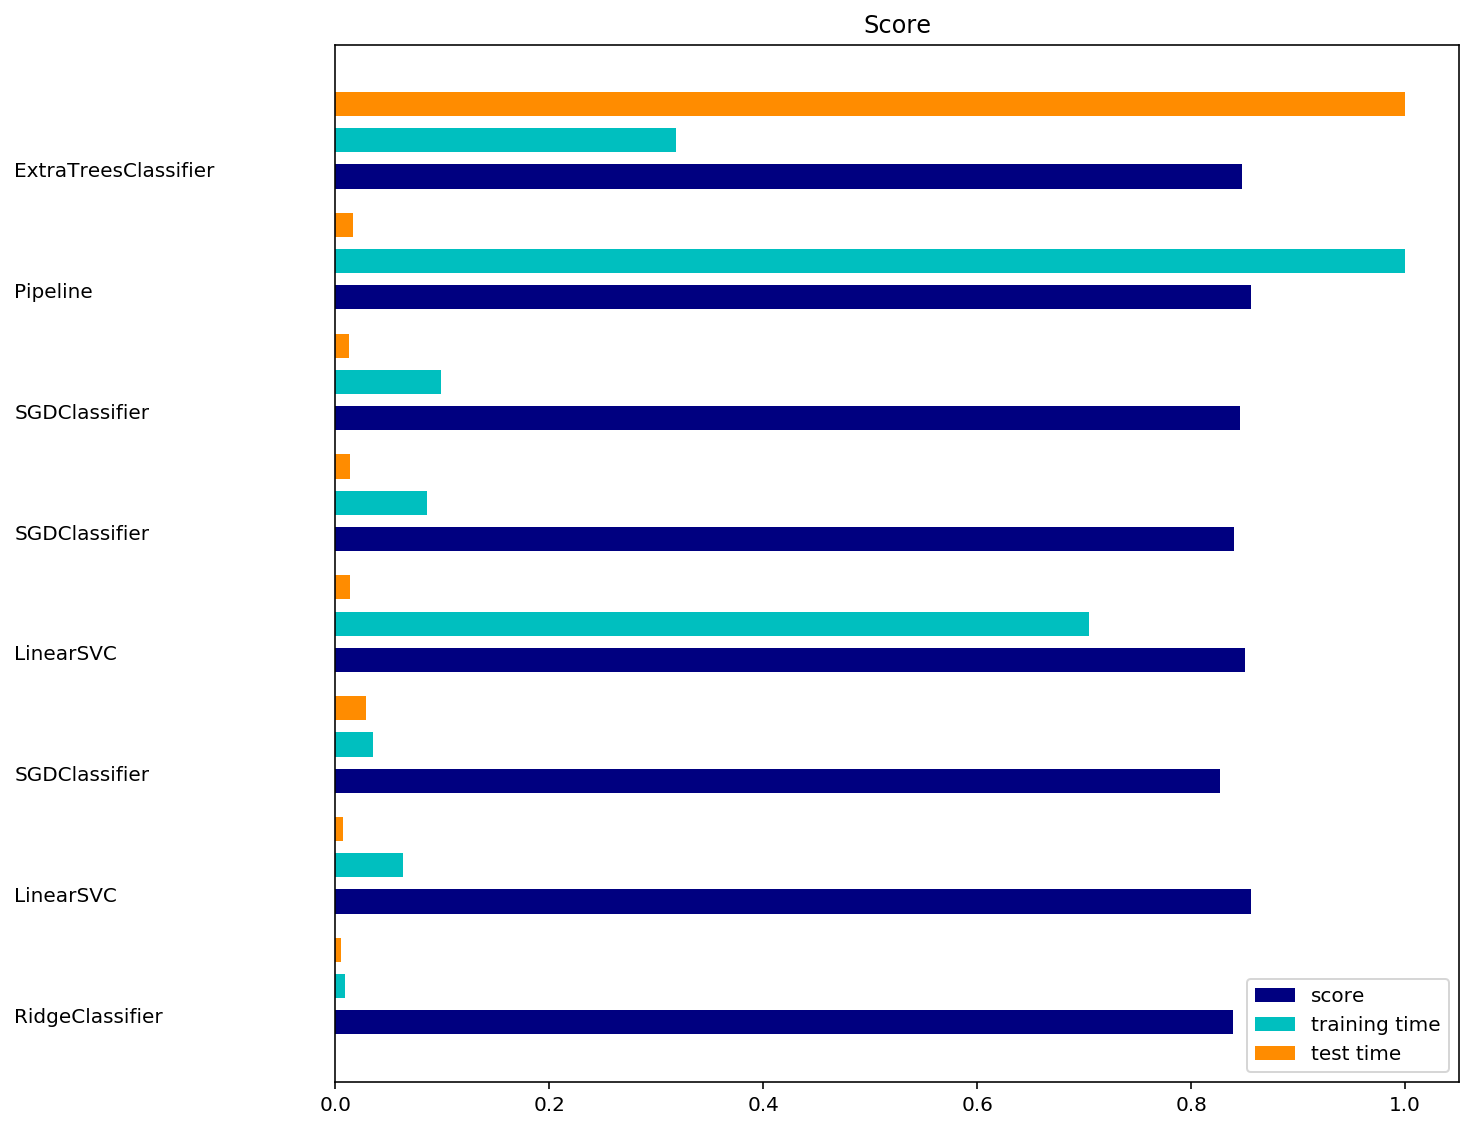

the best model is: LinearSVC, the accuracy is: 0.856
the best model is: Pipeline, the accuracy is: 0.856


In [15]:
results_model1 = trainandplot(X_w2vm_train, X_w2vm_test)
for i in range(0,8):
    if results_model1[1][i] == max(results_model1[1]):
        print ('the best model is: %s, the accuracy is: %0.3f'%(results_model1[0][i], results_model1[1][i]))

In [16]:
#方法2：在方法1的基础上，使用tfidf对每个词加权求均值，并使用分类模型进行分类

print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')

X_tfidf_train = vectorizer.fit_transform([' '.join(document) for document in all_data_nh])
duration = time() - t0
print("n_samples: %d, n_features: %d" % X_tfidf_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")

#X_tfidf_test = vectorizer.transform([' '.join(document) for document in X_ns_test])
#print("n_samples: %d, n_features: %d" % X_tfidf_test.shape)
#print()
duration = time() - t0
print ("Total tfidf procesing time: %0.3f seconds" % duration)


t0 = time()
max_idf = max(vectorizer.idf_)
word2weight = defaultdict(lambda: max_idf, [(word, vectorizer.idf_[index]) 
                                            for word, index in vectorizer.vocabulary_.items()])

def w2v_tfidf(data):
    return np.array([np.mean([w2v[word] * word2weight[word]  for word in document if word in w2v]
                  or [np.zeros(size)], axis = 0) for document in data])

X_w2v_tfidf_train = w2v_tfidf(X_nh_train)
X_w2v_tfidf_test = w2v_tfidf(X_nh_test)

duration = time() - t0
print ("Total tfidf classification vectors processing time: %0.3f seconds" % duration)

Extracting features from the training data using a sparse vectorizer
n_samples: 3387, n_features: 33916

Extracting features from the test data using the same vectorizer
Total tfidf procesing time: 0.688 seconds
Total tfidf classification vectors processing time: 11.641 seconds


Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.028s
test time:  0.001s
accuracy:   0.850

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 0.825s
test time:  0.002s
accuracy:   0.876

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 6.245s
test time:  0.001s
accuracy:   0.859

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.577s
test time:  0.002s
accuracy:   0.850

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.507s
test time:  0.002s
accuracy:   0.823

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 7.842s
test time:  0.002s
accuracy:   0.873

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
         

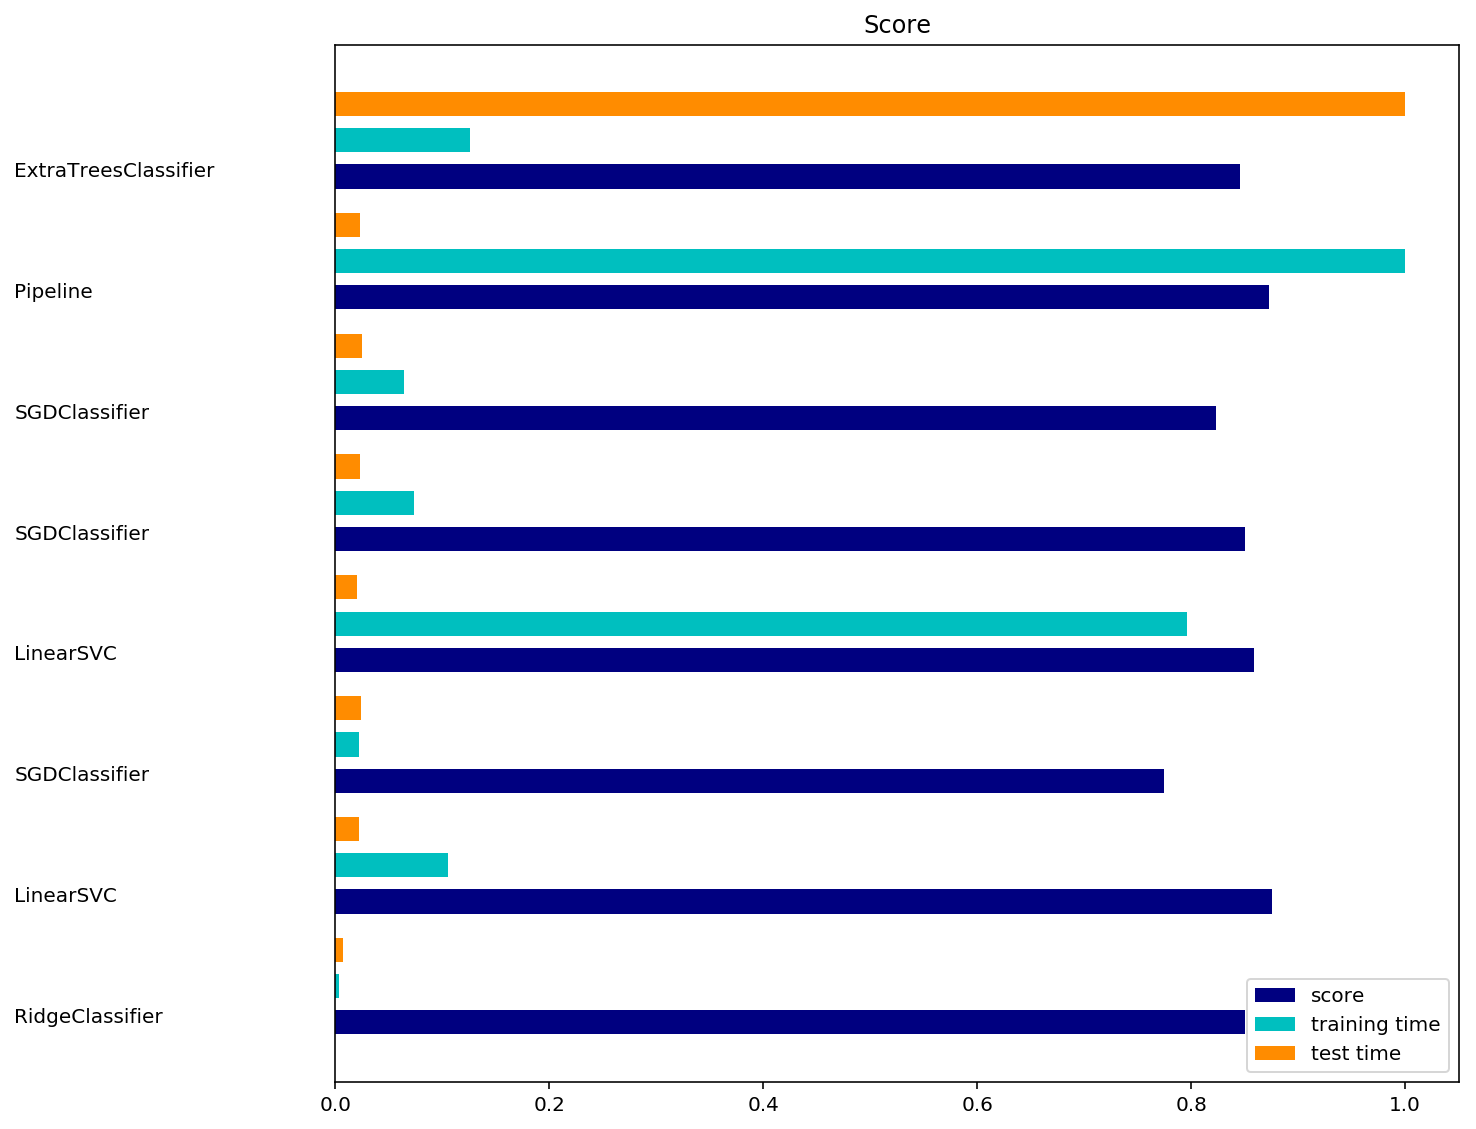

the best model is: LinearSVC, the accuracy is: 0.876


In [17]:
results_model2 = trainandplot(X_w2v_tfidf_train, X_w2v_tfidf_test)
for i in range(0,8):
    if results_model2[1][i] == max(results_model2[1]):
        print ('the best model is: %s, the accuracy is: %0.3f'%(results_model2[0][i], results_model2[1][i]))

### 完善

## IV. 结果
### 模型的评价与验证


### 合理性分析

## V. 项目结论
### 结果可视化


### 对项目的思考

### 需要作出的改进


### 一些尝试